In [2]:
import pandas as pd
import yfinance as yf

In [4]:
nvidia = yf.Ticker('NVDA')
data = nvidia.history(start = '2021-01-01', end = '2024-04-07', interval = '1d')
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-04 00:00:00-05:00,130.741698,136.211611,129.327456,130.833984,56064000,0.0,0.0
2021-01-05 00:00:00-05:00,130.696805,134.126415,130.569595,133.739807,32276000,0.0,0.0
2021-01-06 00:00:00-05:00,131.921475,132.145950,125.571081,125.855423,58042400,0.0,0.0
2021-01-07 00:00:00-05:00,129.377326,133.470401,128.569188,133.133682,46148000,0.0,0.0
2021-01-08 00:00:00-05:00,133.318222,133.901885,130.120578,132.462692,29252800,0.0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 819 entries, 2021-01-04 00:00:00-05:00 to 2024-04-05 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          819 non-null    float64
 1   High          819 non-null    float64
 2   Low           819 non-null    float64
 3   Close         819 non-null    float64
 4   Volume        819 non-null    int64  
 5   Dividends     819 non-null    float64
 6   Stock Splits  819 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 51.2 KB


In [7]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,819.000000,819.000000,819.000000,819.000000,8.190000e+02,819.000000,819.000000
mean,287.534306,292.940950,282.030668,287.800112,4.643669e+07,0.000635,0.004884
std,175.816431,178.706949,172.574797,175.783442,1.728553e+07,0.005002,0.139771
min,109.628152,117.262453,108.049329,112.186234,1.462760e+07,0.000000,0.000000
25%,162.293973,167.057844,159.397707,163.288788,3.525865e+07,0.000000,0.000000
50%,222.745002,226.599058,218.561492,222.076035,4.523950e+07,0.000000,0.000000
75%,403.109086,409.827820,394.780391,402.093491,5.604555e+07,0.000000,0.000000
max,958.510010,974.000000,935.099976,950.020020,1.543911e+08,0.040000,4.000000


Text(0, 0.5, 'Closing Price($)')

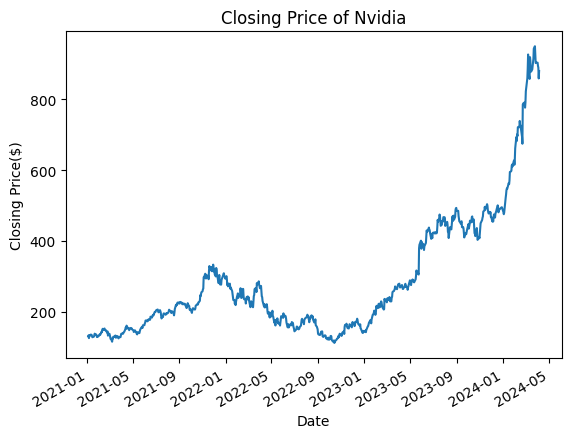

In [11]:
import matplotlib.pyplot as plt
data['Close'].plot()
plt.title('Closing Price of Nvidia')
plt.ylabel('Closing Price($)')

Text(0.5, 1.0, 'Sales Volume for Nvidia')

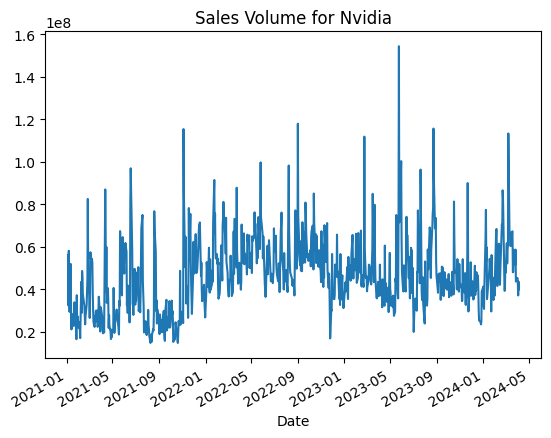

In [12]:
data['Volume'].plot()
plt.title('Sales Volume for Nvidia')

In [13]:
# moving average
ma_intervals = [15, 30,60, 90]
for ma in ma_intervals:
  data['MA_'+str(ma)] = data['Close'].rolling(ma).mean()

Text(0.5, 1.0, 'Moving Average for Nvidia(X days)')

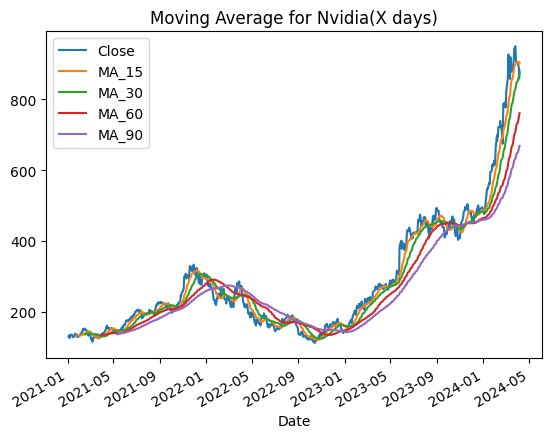

In [14]:
data[['Close','MA_15','MA_30','MA_60','MA_90']].plot()
plt.title('Moving Average for Nvidia(X days)')

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = data[['Open','High','Low','Volume']]
lr.fit(X.loc['2021-01-01':'2024-03-01'], data.loc['2021-01-01':'2024-03-01']['Close'])

LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error
mean_squared_error(lr.predict(X.loc['2024-03-01':]), data.loc['2024-03-01':]['Close'])

121.9051198916466

In [17]:
predictions = lr.predict(X.loc['2024-03-01':])

In [18]:
predictions_df = pd.DataFrame(columns = ['Predictions'], index = data.loc['2024-03-01':].index, data = predictions)

In [19]:
predictions_df['Actual'] = data.loc['2024-03-01':]['Close']

Text(0.5, 1.0, 'Linear Regression Predicitons for Nvidia')

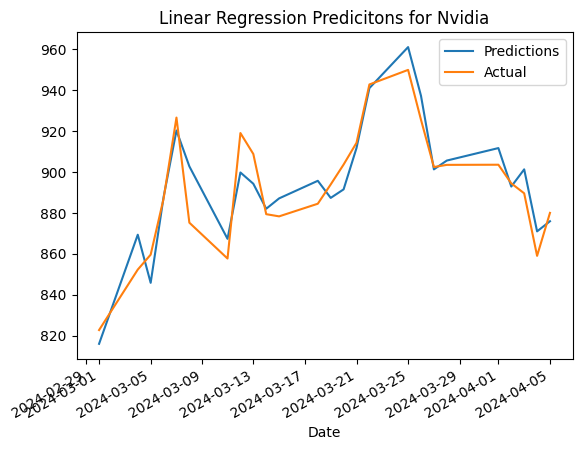

In [20]:
predictions_df.plot()
plt.title('Linear Regression Predicitons for Nvidia')

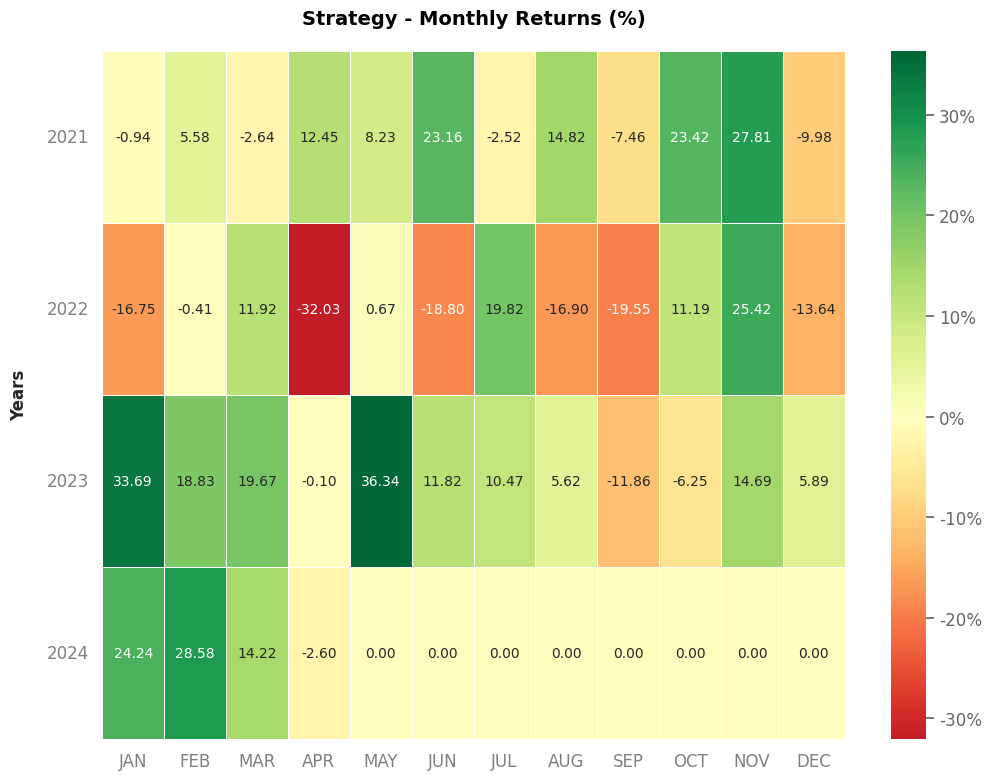

In [21]:

import yfinance as yf
import quantstats as qs
import pandas as pd

# Download historical data for NVDA
nvidia = yf.Ticker('NVDA')
data = nvidia.history(start='2021-01-01', end='2024-04-07', interval='1d')['Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Set the index to datetime
returns.index = pd.to_datetime(returns.index)

# Generate heatmap
qs.plots.monthly_heatmap(returns, figsize=(10, 8))


In [22]:
import yfinance as yf
import pandas as pd
import ta
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Download historical data for NVDA
nvidia = yf.Ticker('NVDA')
data = nvidia.history(start='2021-01-01', end='2024-04-07', interval='1d')

# Calculate SMA and RSI
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()
data['RSI'] = ta.momentum.RSIIndicator(data['Close'], window=14).rsi()

# Reset index of the DataFrame data
data.reset_index(inplace=True)

# Filter data for the specified date range
start_date = '2021-01-01'
end_date = '2024-04-07'
data_filtered = data.loc[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

# Define features and target variable
features = ["Open", "High", "Low", "Volume", "SMA_50", "SMA_200", "RSI"]
X = data_filtered[features]
y = data_filtered['Close']

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the imputed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 35.240454495281526


In [32]:
# Extract the first 10 dates from the filtered data
dates = data_filtered.iloc[:10]['Date'].values

# Create a DataFrame with dates, actual, and predicted values
result_df = pd.DataFrame({'Date': dates,
'Actual': y_test[:10],
'Predicted': predictions[:10]})

# Print the DataFrame with improved formatting
print(result_df)

                   Date      Actual   Predicted
86  2021-01-04 05:00:00  147.833481  147.035566
432 2021-01-05 05:00:00  132.511063  133.496999
799 2021-01-06 05:00:00  875.280029  917.199302
417 2021-01-07 05:00:00  154.518692  156.245249
678 2021-01-08 05:00:00  455.748535  456.244606
532 2021-01-11 05:00:00  229.597366  228.170839
598 2021-01-12 05:00:00  312.539764  311.768299
767 2021-01-13 05:00:00  598.701904  601.030508
192 2021-01-14 05:00:00  210.424088  211.998136
537 2021-01-15 05:00:00  207.438202  206.340730


<Axes: xlabel='Date'>

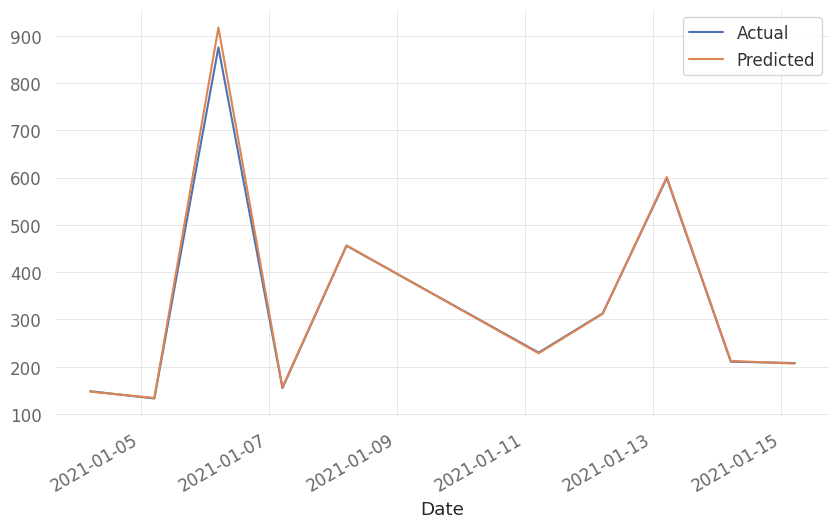

In [33]:
result_df.plot(x = 'Date', y = ['Actual', 'Predicted'])

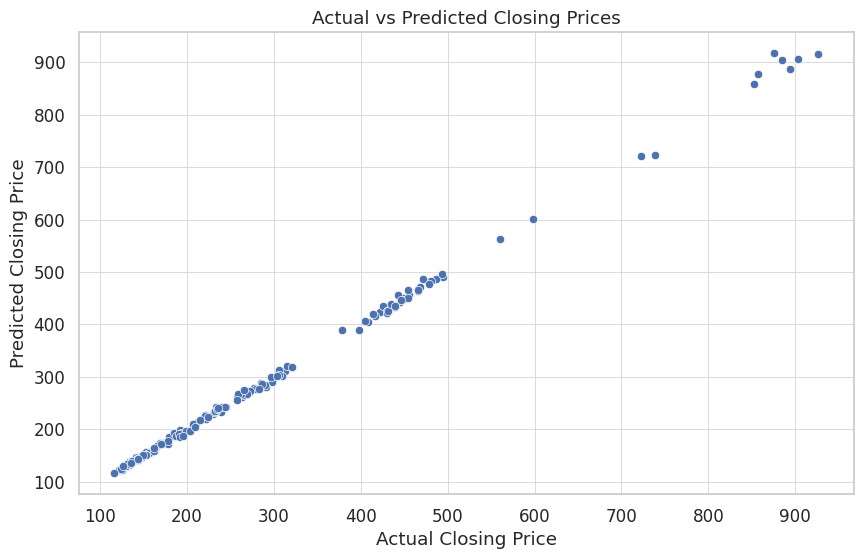

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Set the style of seaborn plot
sns.set_style("whitegrid")

# Create a scatter plot of actual vs predicted closing prices
plt.figure(figsize=(10, 6))
sns.scatterplot(data=result_df, x='Actual', y='Predicted')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.show()